In [87]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sp
import cmath

G_F = 1.1663787*10**(-5)
V_cb = 40.9*10**(-3)
tau_l_b = 1.409*10**(-12)

tau_total = 6.58*10**(-25)/tau_l_b
#print(tau_total)

#masses(GeV)
m_l_b = 5.6202
m_l_c = 2.59225
m_tau = 1.77686
m_e = 0.000511
m_uon = 0.1057
m_b = 4.18
m_c = 1.275

m_l = m_tau
# Spacing and defining range

q_2 = np.linspace(m_l**2, (m_l_b - m_l_c)**2, 10000)
q_2_max = (m_l_b-m_l_c)**2
#S_R = 0.15
#S_L = 0.16

#error values
er_f_0_Ff = 0.064
er_f_plus_Ff = 0.0090
er_f_90_Ff = 0.0079
er_g_0_Ff = 0.011
er_g_plus_Ff = 0.064
er_g_90_Ff = 0.16

er_f_0_Af = 0.66
er_f_plus_Af = 0.31
er_f_90_Af = 0.25
er_g_0_Af = 0.33
er_g_plus_Af = 0.65
er_g_90_Af = 1.9



# Initializing real numbers
#x = 0.07
#y = -0.16

#a=-0.01
#b = -0.39

# converting x and y into complex number
#z = complex(x,y);
#y = complex(a,b);
def D_gamma(g_L,g_R,m_l,q_2):
  #g_L = 0
  #g_S = 0
  g_S = 0
  g_P = 0

  lamda_l = ((m_l_b-m_l_c)**2 -q_2)*((m_l_b+m_l_c)**2-q_2)

  sigma_G =  1
  m_1 = m_l_b + m_l_c
  m_2 = m_l_b - m_l_c

  Q_1 = m_1**2 - q_2      #Qplus
  Q_2 = m_2**2 - q_2      #Qminus


  w = ((m_l_b**2 + m_l_c**2-q_2)/(2*m_l_b*m_l_c))
  s_1 = (m_l_b + m_l_c)**2 - q_2    #s-plus
  s_2 = (m_l_b - m_l_c)**2 - q_2    # s- minus

  #form factors
  f_0 = 0.545 + (-2.21)*(w-1)
  f_plus = 0.1628 + 1.16*(w-1)
  f_90 = 0.1690 + 0.57*(w-1)

  g_0 = 0.221 +  0.94*(w-1)
  g_plus = 0.582 + (-2.24)*(w-1)
  g_90 = 1.22 + (-6.1)*(w-1)



  #helicty amplitudes
  F_V_1 = sigma_G*(((m_l_b - m_l_c)**2*(f_90 - f_plus)/s_2)) - f_90
  F_V_2 = sigma_G*m_l_b*(m_l_b - m_l_c)*(f_90 - f_plus)/(s_2)
  F_V_3 = sigma_G*(m_l_b*(m_l_b + m_l_c))*(s_2*f_0 + q_2*f_90 - (m_l_b - m_l_c)**2*f_plus)/(q_2*s_2)

  F_A_1 = sigma_G*((m_l_b + m_l_c)**(2)*((g_90 - g_plus)/s_1)) - g_90
  F_A_2 = -(sigma_G*m_l_b*(m_l_b + m_l_c)*(g_90 - g_plus)/s_1)
  F_A_3 = sigma_G*((m_l_b*(m_l_b - m_l_c)*(-s_1*g_0 - q_2*g_90 + (m_l_b + m_l_c)**2*g_plus))/(q_2*s_1))


  H_V_t = (1+ g_L + g_R)*(np.sqrt(Q_2/q_2)*(F_V_1*m_1 - F_V_3*(q_2/m_l_b)))
  H_V_0 = (1+ g_L + g_R)*(np.sqrt(Q_1/q_2)*(F_V_1*m_2 - F_V_2*(q_2/m_l_b)))
  H_V_1 = (1+ g_L + g_R)*(np.sqrt(2*Q_1)*(-F_V_1 + F_V_2*(m_2/m_l_b)))

  H_A_t = (1+ g_L - g_R)*(np.sqrt(Q_1/q_2)*(F_A_1*m_2 + F_A_3*(q_2/m_l_b)))
  H_A_0 = (1+ g_L - g_R)*(np.sqrt(Q_2/q_2)*(F_A_1*m_1 + F_A_2*(q_2/m_l_b)))
  H_A_1 = (1+ g_L - g_R)*(np.sqrt(2*Q_2)*(-F_A_1 - F_A_2*(m_1/m_l_b)))


  #B_SM_1
  H_phalf_0 = H_V_0 - H_A_0
  H_mhalf_0 = H_V_0 + H_A_0
  H_phalf_1 = H_V_1 - H_A_1
  H_mhalf_1 = H_V_1 + H_A_1
  H_phalf_t = H_V_t - H_A_t
  H_mhalf_t = H_V_t + H_A_t

  B_SM_1 = abs(H_phalf_0)**2 + abs(H_mhalf_0)**2 + abs(H_phalf_1)**2 + abs(H_mhalf_1)**2
  B_SM_2 = abs(H_phalf_0)**2 + abs(H_mhalf_0)**2 + abs(H_phalf_1)**2 + abs(H_mhalf_1)**2 + 3*(abs(H_phalf_t)**2 + abs(H_mhalf_t)**2)

  #B_NP
  H_S_0 =  g_S*(np.sqrt(s_1)/(m_b-m_c))*((m_2)*F_V_1-(q_2/m_l_b)*F_V_3)
  H_P_0 = -g_P*(np.sqrt(s_2)/(m_b+m_c))*((m_1)*F_V_1+(q_2/m_l_b)*F_V_3)

  H_SP_phalf_0 = H_P_0 + H_S_0
  H_SP_mhalf_0 = -H_P_0 + H_S_0

  B_NP_3 = abs(H_SP_phalf_0)**2 + abs(H_SP_mhalf_0)**2

  #B_int_4
  B_int_4 = (H_phalf_t*np.conjugate(H_SP_phalf_0) + H_mhalf_t*np.conjugate(H_SP_mhalf_0)).real





  #differential decay distribution
  p_l_c = (np.sqrt(lamda_l))/(2*m_l_b)
  gamma_0 = ((G_F**(2))*abs(V_cb)**2*q_2*abs(p_l_c)/(192*np.pi**3*m_l_b**2))*(1-(m_l**2/q_2))**2
  D_gamma_tau = gamma_0*(B_SM_1 +((m_l**2)/(2*q_2))*B_SM_2 + (3/2)*B_NP_3 + (3*m_l/np.sqrt(q_2))*B_int_4)
#print(gamma_0)
  return D_gamma_tau


#with errors

def D_gamma_tau_u(m_l,q_2):
  g_L = 0
  g_R = 0
  g_S = 0
  g_P = 0

  lamda_l = ((m_l_b-m_l_c)**2 -q_2)*((m_l_b+m_l_c)**2-q_2)

  sigma_G =  1
  m_1 = m_l_b + m_l_c
  m_2 = m_l_b - m_l_c

  Q_1 = m_1**2 - q_2      #Qplus
  Q_2 = m_2**2 - q_2      #Qminus


  w = ((m_l_b**2 + m_l_c**2-q_2)/(2*m_l_b*m_l_c))
  s_1 = (m_l_b + m_l_c)**2 - q_2    #s-plus
  s_2 = (m_l_b - m_l_c)**2 - q_2    #s- minus

  #form factors
  f_0_u = (0.545 + er_f_0_Ff) + (-2.21+er_f_0_Af)*(w-1)
  f_plus_u = (0.1628 + er_f_plus_Ff) + (1.16 + er_f_plus_Af)*(w-1)
  f_90_u = (0.1690 + er_f_90_Ff) + (0.57 + er_f_90_Af)*(w-1)

  g_0_u = (0.221 + er_g_0_Ff ) + (0.94 + er_g_0_Af )*(w-1)
  g_plus_u = (0.582 + er_g_plus_Ff) + (-2.24 + er_g_plus_Af)*(w-1)
  g_90_u = (1.22 + er_g_90_Ff) + (-6.1 + er_g_90_Af)*(w-1)




  #form factors
  F_V_1_u = sigma_G*(((m_l_b - m_l_c)**2*(f_90_u - f_plus_u)/s_2)) - f_90_u
  F_V_2_u = sigma_G*m_l_b*(m_l_b - m_l_c)*(f_90_u - f_plus_u)/(s_2)
  F_V_3_u = sigma_G*(m_l_b*(m_l_b + m_l_c))*(s_2*f_0_u + q_2*f_90_u - (m_l_b - m_l_c)**2*f_plus_u)/(q_2*s_2)

  F_A_1_u = sigma_G*((m_l_b + m_l_c)**(2)*((g_90_u - g_plus_u)/s_1)) - g_90_u
  F_A_2_u = -(sigma_G*m_l_b*(m_l_b + m_l_c)*(g_90_u - g_plus_u)/s_1)
  F_A_3_u = sigma_G*((m_l_b*(m_l_b - m_l_c)*(-s_1*g_0_u - q_2*g_90_u + (m_l_b + m_l_c)**2*g_plus_u))/(q_2*s_1))

  #helicity amplitudes
  H_V_t_u = (1+ g_L + g_R)*(np.sqrt(Q_2/q_2)*(F_V_1_u*m_1 - F_V_3_u*(q_2/m_l_b)))
  H_V_0_u = (1+ g_L + g_R)*(np.sqrt(Q_1/q_2)*(F_V_1_u*m_2 - F_V_2_u*(q_2/m_l_b)))
  H_V_1_u = (1+ g_L + g_R)*(np.sqrt(2*Q_1)*(-F_V_1_u + F_V_2_u*(m_2/m_l_b)))

  H_A_t_u = (1+ g_L - g_R)*(np.sqrt(Q_1/q_2)*(F_A_1_u*m_2 + F_A_3_u*(q_2/m_l_b)))
  H_A_0_u = (1+ g_L - g_R)*(np.sqrt(Q_2/q_2)*(F_A_1_u*m_1 + F_A_2_u*(q_2/m_l_b)))
  H_A_1_u = (1+ g_L - g_R)*(np.sqrt(2*Q_2)*(-F_A_1_u - F_A_2_u*(m_1/m_l_b)))


  #B_SM_1
  H_phalf_0_u = H_V_0_u - H_A_0_u
  H_mhalf_0_u = H_V_0_u + H_A_0_u
  H_phalf_1_u = H_V_1_u - H_A_1_u
  H_mhalf_1_u = H_V_1_u + H_A_1_u
  H_phalf_t_u = H_V_t_u - H_A_t_u
  H_mhalf_t_u = H_V_t_u + H_A_t_u

  B_SM_1_u = abs(H_phalf_0_u)**2 + abs(H_mhalf_0_u)**2 + abs(H_phalf_1_u)**2 + abs(H_mhalf_1_u)**2
  B_SM_2_u = abs(H_phalf_0_u)**2 + abs(H_mhalf_0_u)**2 + abs(H_phalf_1_u)**2 + abs(H_mhalf_1_u)**2 + 3*(abs(H_phalf_t_u)**2 + abs(H_mhalf_t_u)**2)

  #B_NP
  #H_S_0_u =  g_S*(np.sqrt(s_1)/(m_b-m_c))*((m_1)*F_V_1_u-(q_2/m_l_b)*F_V_3_u)
  #H_P_0_u = -g_P*(np.sqrt(s_2)/(m_b+m_c))*((m_2)*F_A_1_u+(q_2/m_l_b)*F_A_3_u)

  #H_S_0 =  g_S*(np.sqrt(s_1)/(m_b-m_c))*((m_2)*F_V_1-(q_2/m_l_b)*F_V_3)
  #H_P_0 = -g_P*(np.sqrt(s_2)/(m_b+m_c))*((m_1)*F_V_1+(q_2/m_l_b)*F_V_3)
  H_S_0_u = 0
  H_P_0_u = 0

  H_SP_phalf_0_u = H_P_0_u + H_S_0_u
  H_SP_mhalf_0_u = -H_P_0_u + H_S_0_u

  B_NP_3_u = abs(H_SP_phalf_0_u)**2 + abs(H_SP_mhalf_0_u)**2

  #B_int_4
  B_int_4_u = (H_phalf_t_u*np.conjugate(H_SP_phalf_0_u) + H_mhalf_t_u*np.conjugate(H_SP_mhalf_0_u)).real





  #differential decay distribution
  p_l_c = (np.sqrt(lamda_l))/(2*m_l_b)
  gamma_0_u = ((G_F**(2))*abs(V_cb)**2*q_2*abs(p_l_c)/(192*np.pi**3*m_l_b**2))*(1-(m_l**2/q_2))**2
  D_gamma_tau_u = gamma_0_u*(B_SM_1_u +((m_l**2)/(2*q_2))*B_SM_2_u + (3/2)*B_NP_3_u + (3*m_l/np.sqrt(q_2))*B_int_4_u)
  return D_gamma_tau_u


def D_gamma_tau_l(m_l,q_2):

  g_L = 0
  g_R = 0
  g_S = 0
  g_P = 0

  lamda_l = ((m_l_b-m_l_c)**2 -q_2)*((m_l_b+m_l_c)**2-q_2)

  sigma_G =  1
  m_1 = m_l_b + m_l_c
  m_2 = m_l_b - m_l_c

  Q_1 = m_1**2 - q_2      #Qplus
  Q_2 = m_2**2 - q_2      #Qminus


  w = ((m_l_b**2 + m_l_c**2-q_2)/(2*m_l_b*m_l_c))
  s_1 = (m_l_b + m_l_c)**2 - q_2    #s-plus
  s_2 = (m_l_b - m_l_c)**2 - q_2    # s- minus

  #form factors
  f_0_l = (0.545 - er_f_0_Ff) + (-2.21 - er_f_0_Af)*(w-1)
  f_plus_l = (0.1628 - er_f_plus_Ff) + (1.16 - er_f_plus_Af)*(w-1)
  f_90_l = (0.1690 - er_f_90_Ff) + (0.57 - er_f_90_Af)*(w-1)

  g_0_l = (0.221 - er_g_0_Ff ) + (0.94 - er_g_0_Af )*(w-1)
  g_plus_l = (0.582 - er_g_plus_Ff) + (-2.24 - er_g_plus_Af)*(w-1)
  g_90_l = (1.22 - er_g_90_Ff) + (-6.1 - er_g_90_Af)*(w-1)

  #form factors
  F_V_1_l = sigma_G*(((m_l_b - m_l_c)**2*(f_90_l - f_plus_l)/s_2)) - f_90_l
  F_V_2_l = sigma_G*m_l_b*(m_l_b - m_l_c)*(f_90_l - f_plus_l)/(s_2)
  F_V_3_l = sigma_G*(m_l_b*(m_l_b + m_l_c))*(s_2*f_0_l + q_2*f_90_l - (m_l_b - m_l_c)**2*f_plus_l)/(q_2*s_2)

  F_A_1_l = sigma_G*((m_l_b + m_l_c)**(2)*((g_90_l - g_plus_l)/s_1)) - g_90_l
  F_A_2_l = -(sigma_G*m_l_b*(m_l_b + m_l_c)*(g_90_l - g_plus_l)/s_1)
  F_A_3_l = sigma_G*((m_l_b*(m_l_b - m_l_c)*(-s_1*g_0_l - q_2*g_90_l + (m_l_b + m_l_c)**2*g_plus_l))/(q_2*s_1))

  #helicity amplitudes
  H_V_t_l = (1+ g_L + g_R)*(np.sqrt(Q_2/q_2)*(F_V_1_l*m_1 - F_V_3_l*(q_2/m_l_b)))
  H_V_0_l = (1+ g_L + g_R)*(np.sqrt(Q_1/q_2)*(F_V_1_l*m_2 - F_V_2_l*(q_2/m_l_b)))
  H_V_1_l = (1+ g_L + g_R)*(np.sqrt(2*Q_1)*(-F_V_1_l + F_V_2_l*(m_2/m_l_b)))

  H_A_t_l = (1+ g_L - g_R)*(np.sqrt(Q_1/q_2)*(F_A_1_l*m_2 + F_A_3_l*(q_2/m_l_b)))
  H_A_0_l = (1+ g_L - g_R)*(np.sqrt(Q_2/q_2)*(F_A_1_l*m_1 + F_A_2_l*(q_2/m_l_b)))
  H_A_1_l = (1+ g_L - g_R)*(np.sqrt(2*Q_2)*(-F_A_1_l - F_A_2_l*(m_1/m_l_b)))


  #B_SM_1
  H_phalf_0_l = H_V_0_l - H_A_0_l
  H_mhalf_0_l = H_V_0_l + H_A_0_l
  H_phalf_1_l = H_V_1_l - H_A_1_l
  H_mhalf_1_l = H_V_1_l + H_A_1_l
  H_phalf_t_l = H_V_t_l - H_A_t_l
  H_mhalf_t_l = H_V_t_l + H_A_t_l

  B_SM_1_l = abs(H_phalf_0_l)**2 + abs(H_mhalf_0_l)**2 + abs(H_phalf_1_l)**2 + abs(H_mhalf_1_l)**2
  B_SM_2_l = abs(H_phalf_0_l)**2 + abs(H_mhalf_0_l)**2 + abs(H_phalf_1_l)**2 + abs(H_mhalf_1_l)**2 + 3*(abs(H_phalf_t_l)**2 + abs(H_mhalf_t_l)**2)

  #B_NP
  #H_S_0_l =  g_S*(np.sqrt(s_1)/(m_b-m_c))*((m_1)*F_V_1_l-(q_2/m_l_b)*F_V_3_l)
  #H_P_0_l = -g_P*(np.sqrt(s_2)/(m_b+m_c))*((m_2)*F_A_1_l+(q_2/m_l_b)*F_A_3_l)
  H_S_0_l = 0
  H_P_0_l = 0
  H_SP_phalf_0_l = H_P_0_l + H_S_0_l
  H_SP_mhalf_0_l = -H_P_0_l + H_S_0_l

  B_NP_3_l = abs(H_SP_phalf_0_l)**2 + abs(H_SP_mhalf_0_l)**2

  #B_int_4
  B_int_4_l = (H_phalf_t_l*np.conjugate(H_SP_phalf_0_l) + H_mhalf_t_l*np.conjugate(H_SP_mhalf_0_l)).real





  #differential decay distribution
  p_l_c = (np.sqrt(lamda_l))/(2*m_l_b)
  gamma_0_l = ((G_F**(2))*abs(V_cb)**2*q_2*abs(p_l_c)/(192*np.pi**3*m_l_b**2))*(1-(m_l**2/q_2))**2
  D_gamma_tau_l = gamma_0_l*(B_SM_1_l +((m_l**2)/(2*q_2))*B_SM_2_l + (3/2)*B_NP_3_l + (3*m_l/np.sqrt(q_2))*B_int_4_l)
  return D_gamma_tau_l

print(np.sqrt(0.07**2+0.16**2))
print(np.sqrt(0.01**2+0.39**2))



0.1746424919657298
0.3901281840626232


<ipython-input-87-47d21dc51a77>:89: RuntimeWarning: divide by zero encountered in divide
  F_V_1 = sigma_G*(((m_l_b - m_l_c)**2*(f_90 - f_plus)/s_2)) - f_90
<ipython-input-87-47d21dc51a77>:90: RuntimeWarning: divide by zero encountered in divide
  F_V_2 = sigma_G*m_l_b*(m_l_b - m_l_c)*(f_90 - f_plus)/(s_2)
<ipython-input-87-47d21dc51a77>:91: RuntimeWarning: divide by zero encountered in divide
  F_V_3 = sigma_G*(m_l_b*(m_l_b + m_l_c))*(s_2*f_0 + q_2*f_90 - (m_l_b - m_l_c)**2*f_plus)/(q_2*s_2)
<ipython-input-87-47d21dc51a77>:98: RuntimeWarning: invalid value encountered in subtract
  H_V_t = (1+ g_L + g_R)*(np.sqrt(Q_2/q_2)*(F_V_1*m_1 - F_V_3*(q_2/m_l_b)))
<ipython-input-87-47d21dc51a77>:99: RuntimeWarning: invalid value encountered in subtract
  H_V_0 = (1+ g_L + g_R)*(np.sqrt(Q_1/q_2)*(F_V_1*m_2 - F_V_2*(q_2/m_l_b)))
<ipython-input-87-47d21dc51a77>:100: RuntimeWarning: invalid value encountered in add
  H_V_1 = (1+ g_L + g_R)*(np.sqrt(2*Q_1)*(-F_V_1 + F_V_2*(m_2/m_l_b)))
<ipython-inpu

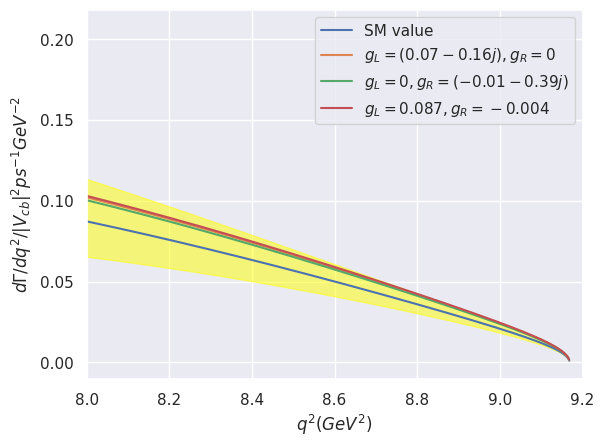

<Figure size 1000x600 with 0 Axes>

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

# Define your functions and variables here...

q_2_values = np.linspace(8, (m_l_b - m_l_c) ** 2, 1000)

# Compute D_gamma for different combinations of S_L and S_R
g_L_values = [0.07 - 0.16j,0, 0.087]  # Ensure j is appended to complex numbers
g_R_values = [0, -0.01 - 0.39j, -0.004]  # Ensure j is appended to complex numbers

# Calculate y values with upper and lower bounds of errors
y = (D_gamma(0, 0, m_tau, q_2) / abs(V_cb) ** 2) * (1.52 * 10 ** (12))
y_u = (D_gamma_tau_u(m_tau, q_2) / abs(V_cb) ** 2) * (1.52 * 10 ** (12))
y_l = (D_gamma_tau_l(m_tau, q_2) / abs(V_cb) ** 2) * (1.52 * 10 ** (12))

# Create the plot with shaded error region
plt.plot(q_2, y, label='SM value')
plt.fill_between(q_2, y_l, y_u, color='yellow', alpha=0.5)

for g_L, g_R in zip(g_L_values, g_R_values):
    D_gamma_values = (D_gamma(g_L, g_R, m_l, q_2_values) / abs(V_cb) ** 2) * (1.52 * 10 ** (12))
    plt.plot(q_2_values, D_gamma_values, label=f'$g_L={g_L}, g_R={g_R}$')

plt.xlabel('$q^2 (GeV^2)$')
plt.ylabel('$d\Gamma/dq^2/|V_{cb}|^2 ps^{-1}GeV^{-2}$')
plt.xlim(8, 9.2)
plt.legend()
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.show()


<ipython-input-87-47d21dc51a77>:177: RuntimeWarning: divide by zero encountered in divide
  F_V_1_u = sigma_G*(((m_l_b - m_l_c)**2*(f_90_u - f_plus_u)/s_2)) - f_90_u
<ipython-input-87-47d21dc51a77>:178: RuntimeWarning: divide by zero encountered in divide
  F_V_2_u = sigma_G*m_l_b*(m_l_b - m_l_c)*(f_90_u - f_plus_u)/(s_2)
<ipython-input-87-47d21dc51a77>:179: RuntimeWarning: divide by zero encountered in divide
  F_V_3_u = sigma_G*(m_l_b*(m_l_b + m_l_c))*(s_2*f_0_u + q_2*f_90_u - (m_l_b - m_l_c)**2*f_plus_u)/(q_2*s_2)
<ipython-input-87-47d21dc51a77>:186: RuntimeWarning: invalid value encountered in subtract
  H_V_t_u = (1+ g_L + g_R)*(np.sqrt(Q_2/q_2)*(F_V_1_u*m_1 - F_V_3_u*(q_2/m_l_b)))
<ipython-input-87-47d21dc51a77>:187: RuntimeWarning: invalid value encountered in subtract
  H_V_0_u = (1+ g_L + g_R)*(np.sqrt(Q_1/q_2)*(F_V_1_u*m_2 - F_V_2_u*(q_2/m_l_b)))
<ipython-input-87-47d21dc51a77>:188: RuntimeWarning: invalid value encountered in add
  H_V_1_u = (1+ g_L + g_R)*(np.sqrt(2*Q_1)*(-

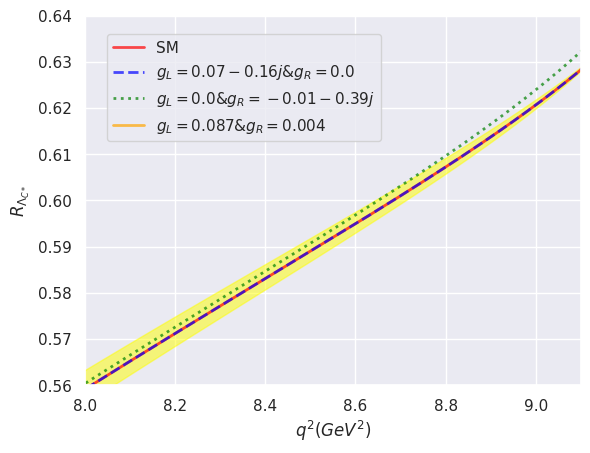

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define your functions and variables

m_tau = 1.77686
m_e = 0.000511
m_uon = 0.1057

# Generate q^2 values
q_2 = np.linspace(m_tau**2, (m_l_b - m_l_c)**2, 1000)

# Define your function R_D
def R_D(q_2):
    return (D_gamma(0.087, 0.004, m_tau, q_2) / D_gamma(-0.37, 0.48, m_uon, q_2))



y_u = (D_gamma_tau_u(m_tau,q_2)/D_gamma_tau_u(m_uon,q_2))
y_l = (D_gamma_tau_l(m_tau,q_2)/D_gamma_tau_l(m_uon,q_2))

# Create the plot with shaded error region


# Calculate y values
y_2 = D_gamma(0.07 - 0.16j, 0, m_tau, q_2) / D_gamma(0.07 - 0.16j, 0, m_uon, q_2)
y_3 = D_gamma(0.0, -0.01 - 0.39j, m_tau, q_2) / D_gamma(0, -0.01 - 0.39j, m_uon, q_2)
y_4 = D_gamma(0.0, 0.0, m_tau, q_2) / D_gamma(0, 0.0, m_uon, q_2)
R_D_values = R_D(q_2)

plt.plot(q_2, y_4 , linewidth=2, color='red', alpha=0.7, label='SM')
plt.fill_between(q_2, y_l, y_u, color='yellow', alpha=0.5)

# Set Seaborn style
sns.set()


# Plot using Seaborn
plt.plot(q_2, y_2, linestyle='--', linewidth=2, color='blue', alpha=0.7, label='$g_{L} = 0.07 - 0.16j& g_{R}=0.0$')

plt.plot(q_2, y_3, linestyle=':', linewidth=2, color='green', alpha=0.7, label='$g_{L} = 0.0 & g_{R}=-0.01 - 0.39j$')

#plt.plot(q_2, y_4, linestyle='-', linewidth=2, color='red', alpha=0.7, label='SM')

plt.plot(q_2, R_D_values, linestyle='-', linewidth=2, color='orange', alpha=0.7,label='$g_{L} = 0.087 & g_{R}=0.004$')

plt.xlabel('$q^2 (GeV^2)$')
plt.ylabel('$R_{\Lambda_{C*}}$')
plt.xlim(8, 8.6)
plt.ylim(0.56, 0.66)
#plt.legend(loc='upper left', bbox_to_anchor=(0.03, 0.97), fontsize='small')
#plt.legend(loc='upper left', bbox_to_anchor=(0.03, 0.97, 0.1, 0.01))
plt.legend(loc='upper left', bbox_to_anchor=(0.0001, 0.96, 0.0005, 0.06))
plt.xlabel('$q^2 (GeV^2)$')
plt.ylabel('$R_{\Lambda_{C*}}$')
plt.xlim(8, 9.1)
plt.ylim(0.56, 0.64)
plt.legend(loc='upper left', bbox_to_anchor=(0.03, 0.97))
plt.show()

In [90]:
from scipy.integrate import quad
import cmath
#m_tau**(2),(m_l_b-m_l_c)**(2)
BR_tau_gl,_= quad(lambda x:D_gamma(0.07-0.16j,0,m_tau,x),m_tau**(2),(m_l_b-m_l_c)**(2))
BR_uon_gl,_= quad(lambda x:D_gamma(0.07-0.16j,0,m_uon,x),m_uon**(2),(m_l_b-m_l_c)**(2))
BR_gl = BR_tau_gl/BR_uon_gl
print(BR_gl)

BR_tau_gr,_= quad(lambda x:D_gamma(0,-0.01-0.39j,m_tau,x),m_tau**(2),(m_l_b-m_l_c)**(2))
BR_uon_gr,_= quad(lambda x:D_gamma(0,-0.01-0.39j,m_uon,x),m_uon**(2),(m_l_b-m_l_c)**(2))
BR_gr = BR_tau_gr/BR_uon_gr
print(BR_gr)

BR_tau_grl,_= quad(lambda x:D_gamma(0.087,0.004,m_tau,x),m_tau**(2),(m_l_b-m_l_c)**(2))
BR_uon_grl,_= quad(lambda x:D_gamma(0.087,0.004,m_uon,x),m_uon**(2),(m_l_b-m_l_c)**(2))
BR_grl = BR_tau_grl/BR_uon_grl
print(BR_grl)


0.131217976868387
0.13259863123916252
0.13064328734781608


In [86]:
from scipy.integrate import quad
#m_tau**(2),(m_l_b-m_l_c)**(2)
BR_tau,_= quad(lambda x:D_gamma(0,0,m_tau,x),m_tau**(2),(m_l_b-m_l_c)**(2))
print(BR_tau)
print(BR_tau/tau_total)

BR_uon,_= quad(lambda x:D_gamma(0,0,m_uon,x),m_uon**(2),(m_l_b-m_l_c)**(2))
print(BR_uon)

BR = BR_tau/BR_uon
print(BR)

5.684456857505096e-16
0.0012172339988183404
4.3320717124046696e-15
0.13121797686838702


In [75]:
BR_tau_u,_= quad(lambda x:D_gamma_tau_u(m_tau,x),m_tau**(2),(m_l_b-m_l_c)**(2))
print(BR_tau_u)
BR_uon_u,_= quad(lambda x:D_gamma_tau_u(m_uon,x),m_uon**(2),(m_l_b-m_l_c)**(2))
print(BR_uon_u)
BR_u = BR_tau_u/BR_uon_u
print(BR_u)

BR_tau_l,_= quad(lambda x:D_gamma_tau_l(m_tau,x),m_tau**(2),(m_l_b-m_l_c)**(2))
print(BR_tau_l)
BR_uon_l,_= quad(lambda x:D_gamma_tau_l(m_uon,x),m_uon**(2),(m_l_b-m_l_c)**(2))
print(BR_uon_l)
BR_l = BR_tau_l/BR_uon_l
print(BR_l)

8.5634564321179215e-16
6.910501072316541e-15
0.1239194718661302
3.6956998594498354e-16
3.572355721593565e-15
0.10345273952173074


In [ ]:
er_u = BR_u - BR
er_l = BR - BR_l
print(er_u)
print(er_l)
print(0.13121797686838702-0.10345273952173074)

-0.0072985050022568165
0.02776523734665627
0.02776523734665627
